In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
#import csv files into tables
title_basics = pd.read_csv('data/imdb.title.basics.csv')
years = pd.read_csv('data/bothyear.csv') #This is our webscraped csv

In [84]:
years['season'] = years.seasonn.map(lambda x: x.replace(' ',''))

In [85]:
years['release_month'] = years.release.map(lambda x: x[:3])

In [92]:
years["release_month"] = pd.to_datetime(years.release_month, format='%b', errors='coerce').dt.month

In [102]:
years.loc[years['title']=='Incredibles 2']

,Unnamed: 0,title,theaters,release,distributor,gross,total_gross,season_year,seasonn,season,release_month
1893,0,Incredibles 2,"4,410",Jun 15,Walt Disney Studios Motion Pictures\n\n,603113505,608581744,2018,Summer,Summer,6
2349,31,Incredibles 2,"4,410",Jun 15,Walt Disney Studios Motion Pictures\n\n,4827063,608581744,2018,Fall,Fall,6
2706,77,Incredibles 2,"4,410",Jun 15,Walt Disney Studios Motion Pictures\n\n,641176,608581744,2018,Holiday,Holiday,6


In [72]:
years.sample(5)

,Unnamed: 0,title,theaters,release,distributor,gross,total_gross,season_year,seasonn,season,month,release_month
1,1,Aquaman,"4,184",Dec 21,Warner Bros.\n\n,104179199,335061807,2019,Winter,Winter,Dec,12
2868,239,The Second Time Around,1,Nov 30,First Run\n\n,2461,3837,2018,Holiday,Holiday,Nov,11
1421,48,Detective Chinatown 2,115,Feb 16,Warner Bros.\n\n,1657056,1983984,2018,Winter,Winter,Feb,2
1784,191,Night of 7 Years,4,Apr 6,CJ Entertainment\n\n,24281,24281,2018,Spring,Spring,Apr,4
2122,229,Custody,7,Jun 29,Kino Lorber\n\n,80799,83882,2018,Summer,Summer,Jun,6


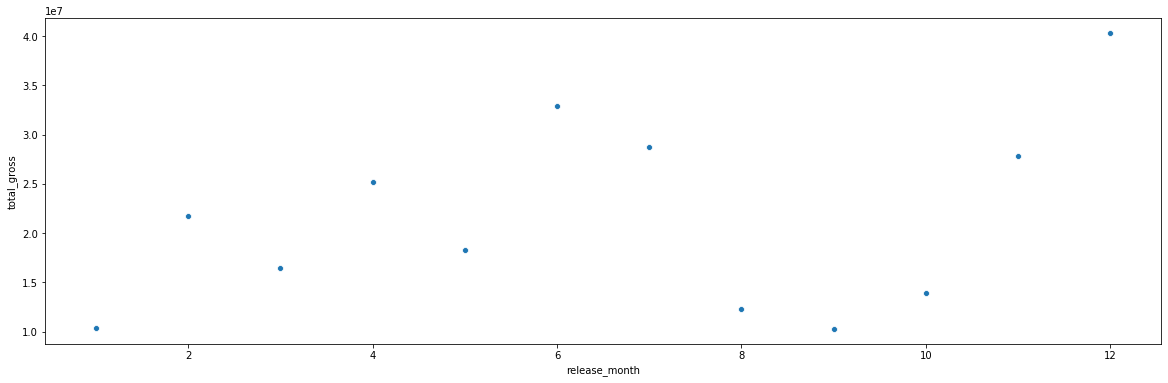

In [101]:
y = years.groupby(['release_month']).total_gross.mean()
x = y.index
figure, ax = plt.subplots(figsize = (20,6))
char = sns.scatterplot(x,y);

In [ ]:
grp = years.groupby(['season_year'])
means = years.groupby(['release_month']).gross.mean().unstack()
# errors = [fall_std18, holiday_std18,
#          spring_std18, summer_std18, 
#          winter_std18]
# years.groupby(['season','season_year']).gross.mean().unstack().
means.plot.bar()
plt.title('Season vs Average Gross');
plt.xlabel('Season');
plt.ylabel('Average Gross');